In [ ]:
pip install sklearn
pip install tensorflow
pip install statsmodels
pip instal scipy

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as smf

In [14]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
Y = iris.target

print("Data shape:", X.shape)
print("Examples:\n", X[:10])
print("\nLabels shape", Y.shape)
print("Examples:\n", Y)
print("Class names:", iris.target_names)

Data shape: (150, 4)
Examples:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]

Labels shape (150,)
Examples:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Class names: ['setosa' 'versicolor' 'virginica']


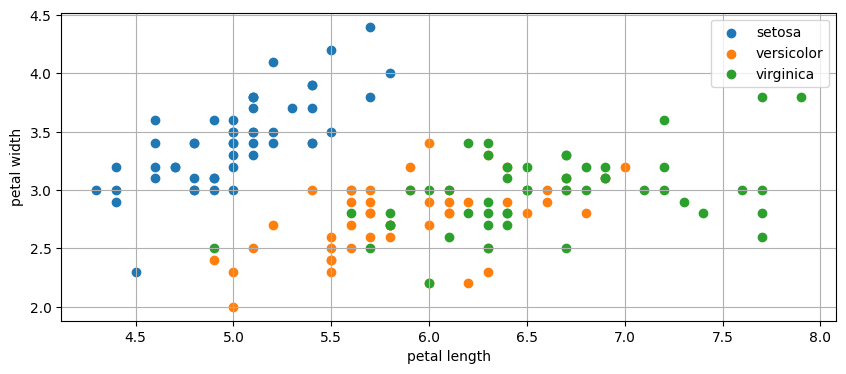

In [16]:
plt.figure(figsize=(10, 4))
plt.scatter(X[Y==0, 0], X[Y==0, 1], label=iris.target_names[0])
plt.scatter(X[Y==1, 0], X[Y==1, 1], label=iris.target_names[1])
plt.scatter(X[Y==2, 0], X[Y==2, 1], label=iris.target_names[2])
plt.legend()
plt.grid(True)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [17]:
X = iris.data[iris.target != 2, :2]
y = iris.target[iris.target != 2]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
probit=smf.Probit(y_train,X_train)
probit.fit()
print(probit.fit().summary())

Optimization terminated successfully.
         Current function value: 0.061105
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.061105
         Iterations 10
                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:                   80
Model:                         Probit   Df Residuals:                       78
Method:                           MLE   Df Model:                            1
Date:                Mon, 20 Feb 2023   Pseudo R-squ.:                  0.9117
Time:                        18:08:24   Log-Likelihood:                -4.8884
converged:                       True   LL-Null:                       -55.352
Covariance Type:            nonrobust   LLR p-value:                 9.545e-24
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1  

In [27]:
params = pd.DataFrame(probit.fit().params, columns=['coef'])
df_test = pd.DataFrame(X_test, columns=['x1', 'x2'])

# Defining the probit function:
import scipy.stats as si
def normsdist(z):
    z = si.norm.cdf(z,0.0,1.0)
    return (z)

# Doing the prediction:
df_test['y_pred'] = df_test['x1'] * params['coef'][0] + df_test['x2'] * params['coef'][1]
df_test['y_pred_Probit'] = normsdist(df_test['y_pred'])
df_test['y_pred_0_1'] = np.where(df_test['y_pred_Probit'] > 0.5, 1, 0)
df_test['y_actual_0_1'] = y_test

print('Accuracy of Probit Model on test set: {:.2f}'.format(accuracy_score(df_test['y_actual_0_1'], 
df_test['y_pred_0_1'])))

In [37]:
# Logit
logit = LogisticRegression(max_iter=1000)
logit.fit(X_train, y_train)
y_pred_logit = logit.predict(X_test)
acc_logit = accuracy_score(y_test, y_pred_logit)
print("Accuracy of the Logit model:", acc_logit)

Accuracy of the Logit model: 1.0
